# 画像処理

In [1]:
%matplotlib inline

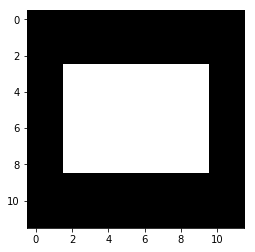

In [2]:
# 画像を読み込んで表示しなさい
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.bmp")

plt.imshow( img, interpolation="None" )
plt.show()

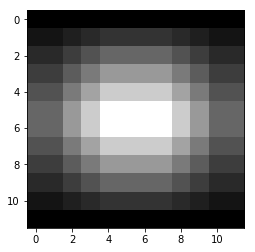

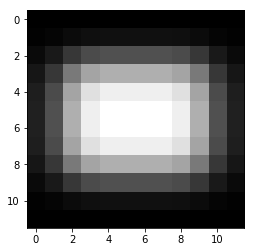

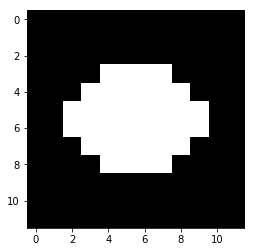

In [3]:
# 画像を平滑化しなさい
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.bmp")

img2 = cv2.blur(img,(5,5))
plt.imshow( img2, interpolation="None" )

img2 = cv2.GaussianBlur(img,(5,5), 0)
plt.figure()
plt.imshow( img2, interpolation="None" )

img2 = cv2.medianBlur(img,5)
plt.figure()
plt.imshow( img2, interpolation="None" )

plt.show()

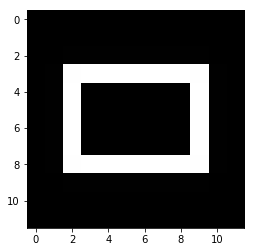

In [4]:
# エッジを抽出をしなさい
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.bmp")

img2 = cv2.Laplacian(img, cv2.CV_64F)

plt.imshow( img2, interpolation="None" )
plt.show()

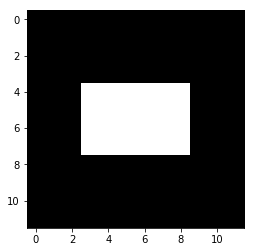

In [5]:
# 収縮処理をしなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test.bmp")

kernel = np.ones((3,3),np.uint8)
img2 = cv2.erode(img,kernel,iterations = 1)

plt.imshow( img2, interpolation="None" )
plt.show()

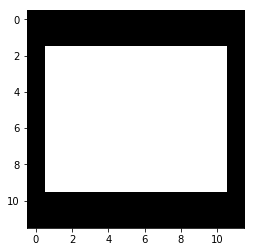

In [6]:
# 膨張処理をしなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test.bmp")

kernel = np.ones((3,3),np.uint8)
img2 = cv2.dilate(img,kernel,iterations = 1)

plt.imshow( img2, interpolation="None" )
plt.show()

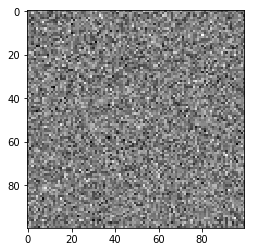

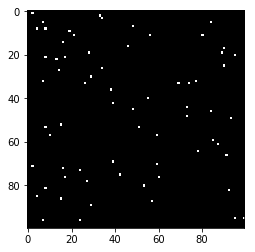

In [7]:
# 画像を二値化しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test2.bmp", 0 )

img2 = np.zeros( img.shape )
img2 = 255 * (img>200)

plt.imshow(img, cmap="gray")

plt.figure()
plt.imshow(img2, cmap="gray")
plt.show()

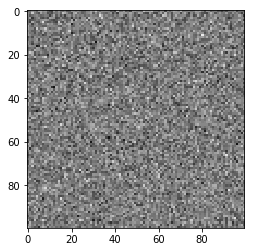

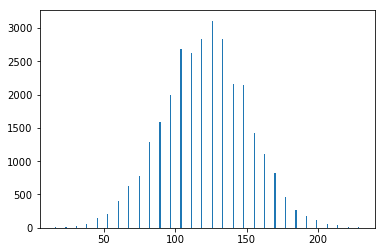

In [8]:
# グレー画像のヒストグラムを計算しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test2.bmp")

plt.imshow(img)

hist, bins = np.histogram( img, 30  )

plt.figure()
plt.bar( bins[:-1], hist )
plt.show()

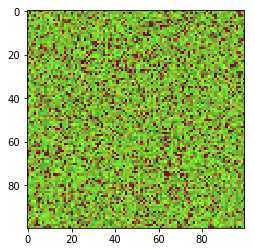

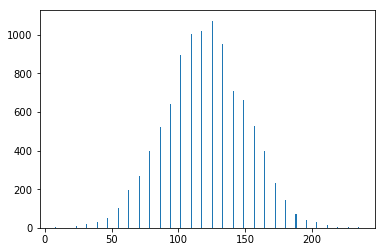

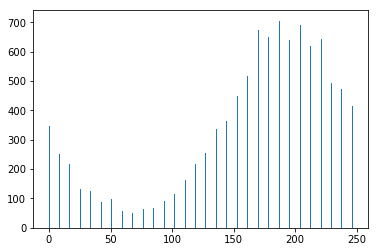

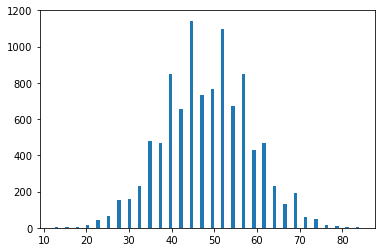

In [9]:
# カラー画像の各チャンネルのヒストグラムを計算しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test3.bmp")

plt.imshow(img)

hist, bins = np.histogram( img[:,:,0], 30  )
plt.figure()
plt.bar( bins[:-1], hist )

hist, bins = np.histogram( img[:,:,1], 30  )
plt.figure()
plt.bar( bins[:-1], hist )

hist, bins = np.histogram( img[:,:,2], 30  )
plt.figure()
plt.bar( bins[:-1], hist )

plt.show()

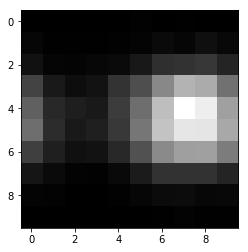

In [10]:
# RとGチャンネルの二次元ヒストグラムを作成し，濃淡画像として表示しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test3.bmp")

plt.imshow(img)

hist, bins1, bins2= np.histogram2d( img[:,:,1].flatten(), img[:,:,2].flatten(), bins=(10, 10))
plt.imshow(hist.T, interpolation="None", cmap="gray")
plt.show()